<a href="https://colab.research.google.com/github/SANKARM18/computer-vision/blob/main/unit3-Hough-Based%20Schemes%20for%20Circular%20Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 12.1M/12.1M [00:00<00:00, 118MB/s]

Extracting files...
Dataset downloaded at: /root/.cache/kagglehub/datasets/draaslan/blood-cell-detection-dataset/versions/1


Loaded images: 5


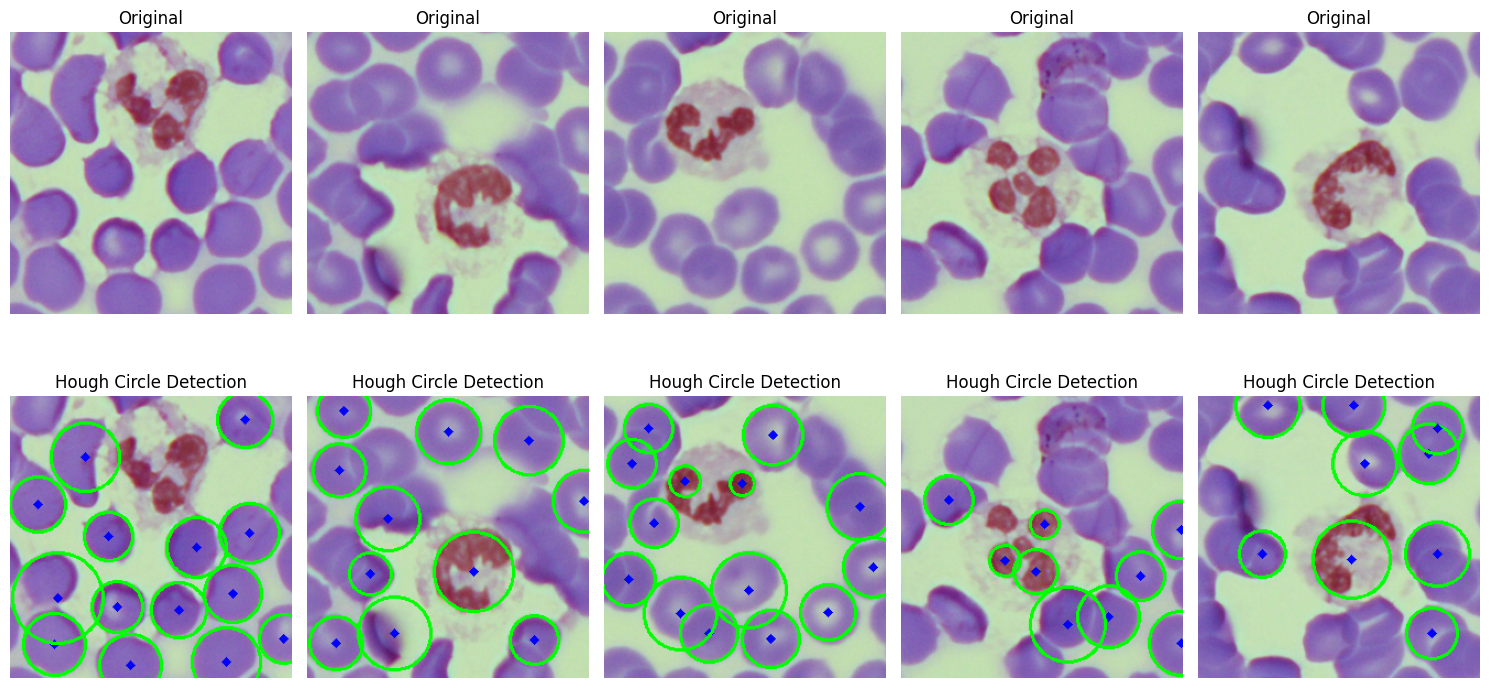

In [ ]:
# ============================================================
# 🧩 Install Required Packages
# ============================================================
!pip install -q kagglehub scikit-image opencv-python matplotlib

# ============================================================
# 📦 Import Libraries
# ============================================================
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import kagglehub

# ============================================================
# 📂 Download Kaggle Dataset (Blood Cell Dataset)
# ============================================================
dataset_path = kagglehub.dataset_download("draaslan/blood-cell-detection-dataset")
print("Dataset downloaded at:", dataset_path)

# ============================================================
# 🖼️ Load Sample Images
# ============================================================
image_folder = os.path.join(dataset_path, "images")
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]

# Load first 5 images
images = [io.imread(f) for f in image_files[:5]]
print("Loaded images:", len(images))

# ============================================================
# ⚙️ Define Function for Circular Object Detection (Hough Transform)
# ============================================================
def detect_circles(image, dp=1.2, min_dist=20, param1=100, param2=30, min_radius=5, max_radius=60):
    """
    Detects circular objects in an image using Hough Circle Transform.

    Parameters:
    - image: Input image (RGB or grayscale)
    - dp: Inverse ratio of accumulator resolution to image resolution
    - min_dist: Minimum distance between detected circle centers
    - param1: Higher threshold for Canny edge detector
    - param2: Accumulator threshold for circle detection
    - min_radius, max_radius: Range of circle sizes

    Returns:
    - output image with detected circles drawn
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Apply Gaussian blur to reduce noise
    gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

    # Detect circles using Hough Transform
    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    output = image.copy()

    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for (x, y, r) in circles[0, :]:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)   # Outer circle
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)   # Center point

    return output

# ============================================================
# 🧠 Apply Hough Circle Detection and Visualize Results
# ============================================================
plt.figure(figsize=(15, 8))

for idx, img in enumerate(images):
    detected_img = detect_circles(img)

    # Original image
    plt.subplot(2, 5, idx + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    # Detected image
    plt.subplot(2, 5, idx + 6)
    plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
    plt.title("Hough Circle Detection")
    plt.axis('off')

plt.tight_layout()
plt.show()
